#  Luminous and Dynamical Mass Estimates of Spiral Galaxies #


One of the coolest things about spiral galaxies is that we can infer the presence of dark matter from the dynamical motion of their gas and stars.  We will look at the distribution of matter and the motion of stars in the spiral galaxy UGC 4895.


**Goal:**  
Investigate amount and radial distribution of dark matter in a spiral galaxy

**Procedure:**
* Rotation curve
    * plot rotation curve 
    * correction of inclination 
    * estimate enclosed mass vs radius 
* plot surface brightness
    * convert surface brightness to luminosity
    * convert luminosity to mass using a M/L ratio
    * estimate luminuous mass vs radius
* compare profiles
    * estimate the amount of dark matter

In [4]:
from astropy.io import ascii
from matplotlib import pyplot as plt
%matplotlib inline
import wget
import numpy as np


## The Data ##

For this exercise, we will use a rotation curve and surface brightness profile for a galaxy named UGC 4895.  The rotation curve data have been provided courtesy of Martha Haynes.  The rotation curve data show the velocity derived from the Doppler Shift of the H$\alpha$ line.  

I have provided the $r$-band radial profile in a file called ugc4895r-ellipse-whdr.dat.  This file was generated from an iraf task called ellipse.  Ellipse will fit the center and elliptical properties of the galaxy and then measure the flux (and other parameters) in concentric ellipses.  You can see the other measured parameters by printing the file


In [6]:
hfile = wget.download('https://raw.githubusercontent.com/rfinn/ASTR390/master/darkmatter/UGC4895.ha.csv')
rfile = wget.download('https://raw.githubusercontent.com/rfinn/ASTR390/master/darkmatter/ugc4895r-ellipse-whdr.dat')

In [7]:
ha = ascii.read(hfile,delimiter=',')
rdat = ascii.read(rfile)


In the cell below, and print the ha table.  Record the columns for the Halpha rotation curve file.

Halpha Rotation Curve
* col 1
* col 2


**Questions:**
1. What does each column contain?
2. Determine the maximum velocity observed from the $H\alpha$ line.  At what wavelength would that line be detected?



In the cell below, print the rdat file.  There are A LOT of columns.  Identify a column names that correspond to the properties listed below: 

* radius
* ellipticity
* position angle
* center
* enclosed flux

## Rotation Curve ##

Look up UGC 4895 using the SDSS navigator http://skyserver.sdss.org/dr14/en/tools/chart/navi.aspx.

Turn the grid feature on, and use the scale to estimate the approximate size of UGC 4895.
Record your results in the cell below.

Compare this to the ellipticity measured in the rdat file.

In [ ]:
mylength =  # longest dimension, major axis
mywidth =   # shortest dimension, minor axis
myellip = mywidth/mylength


### Plotting the Rotation Curve ###

We will next make a plot of the rotation velocity versus distance from the center of the galaxy.

Text(0,0.5,'Rotation Velocity (km/s)')

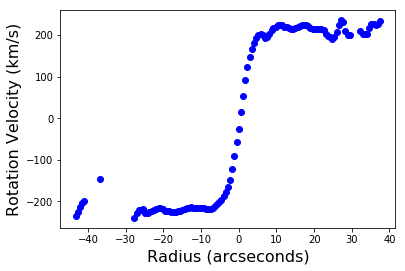

In [15]:
plt.figure()
plt.plot(ha['rad'],ha['vrot'],'bo')
plt.xlabel('Radius (arcseconds)', fontsize=16)
plt.ylabel('Rotation Velocity (km/s)',fontsize=16)


Redo the plot above, but convert the radius from arcseconds to kpc.  To do this, you will need the galaxy's distance.  
* Use NED (https://ned.ipac.caltech.edu/) to get the recession velocity of UGC4895.  Record it below (with the uncertainty).
* Use Hubble's Law to get the distance in Mpc (assume $H_0 = 70$ km/s/Mpc).

$$ v_r = H_0 d $$

* you will also need to convert the radius from units of arcseconds to radians.  Remember 3600 arcseconds = 1 degree.

* You can then use the small angle formula:

$$ radius_{kpc} = radius_{radians} \times d_{kpc} $$

In [ ]:
cz = # recession velocity
d = # distance in Mpc
dkpc = # distance in kpc

r_kpc = #


**Questions**
3. Estimate the maximum/minimum rotation velocity.
4. How does the rotation curve compare with the orbital velocity of planets in our solar system vs. distance from the Sun?

### Correct Rotational Velocity for Inclination ###


When we observe the rotation velocity of an edge-on spiral galaxy, we measure
its true rotation velocity.  If we observe a galaxy that is face-on, we
can not detect any rotation velocity because the rotational motion is 
perpendicular to our line-of-sight.


* Remember the observed and true rotational velocities depend on the
inclination of a galaxy, where the inclination angle is 90 degrees for
an edge-on galaxy and 0 degrees for a face-on galaxy.
* If we assume that all spiral galaxies are perfectly circular, then the apparent
shape of a galaxy tells us about its inclination.  For example, a face-on
galaxy with have equal semi-major (a) and semi-minor (b) axes, whereas a nearly edge-on galaxy will have a semi-major axis that is much larger than the observed semi-minor axis.
* The ratio $b/a$ is given in the rdat file (ellipticity).
* Use this information to calculate the galaxy's inclination, where

$$sin i = \sqrt{1 - \left(\frac{b}{a} \right)^2}.$$

* Use the inclination angles to correct the observed rotational velocities
to true rotational velocities, where

$$ v_{rot} = \frac{v_{rot}(obs)}{sin i} $$


In [ ]:
a = # semi-major axis
b = # semi-minor axis
i = # inclination
vrot = # corrected rotational velocity


### Estimate Mass from Rotational Velocity ###

Now let's think about the motion of one ${\it test}$ star in the galaxy.  Let this star be some distance $r_\star$ from the center of the galaxy.  Gauss's Law tells us that the gravitational acceleration of a mass depends on the amount of material inside the mass's orbit, $M(<r_\star)$.  

Assume that the star is on a circular orbit, and that the only important force on the star is the gravitational force from the combined mass at $r < r_\star$.  Come up with an expression for the velocity of the star as a function of $M(r)$.

Use your relationship to create a plot of enclosed mass vs. radius.



In [ ]:
# plot of enclosed mass in solar masses versus radius in kpc


## Surface Brightness Profile ##
### Convert Surface Brightness to Stellar Mass ###

The plot below shows the surface brightness of the galaxy as a function of radius.  Remember that large magnitudes are fainter, so the graph shows that the galaxy's light is getting fainter as the distance from the center increases.

We want to use the observed brightness to estimate the mass associated with light we see.



Text(0,0.5,'$\\rm r-band \\ Surface \\ Brightness  \\ (mag/arcsec^2)$')

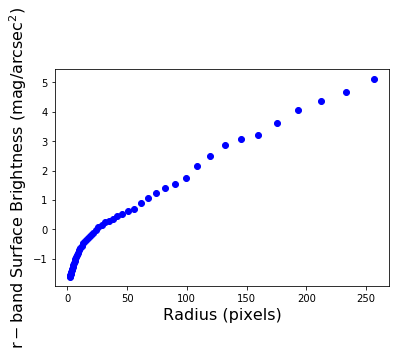

In [9]:
plt.figure()
plt.plot(rdat['SMA'],rdat['MAG'],'bo')
plt.xlabel('Radius (pixels)', fontsize=16)
plt.ylabel(r'$\rm r-band \ Surface \ Brightness  \ (mag/arcsec^2)$',fontsize=16)



We can estimate the stellar mass from the observed color and magnitude of a galaxy.  


First, we can estimate the mass-to-light ration from the color of the galaxy according to Bell+2003 (http://iopscience.iop.org/article/10.1086/378847/fulltext/)

$$\rm (M/L_r) = -0.306 + 1.097(g - r) $$

Use the SDSS navigator to get an approximate value for the $g-r$ color of UCG4895.



In [ ]:
gr = # g-r color
ML = #mass to light ratio


You now have to convert the enclosed flux, TFLUX_E, to units of stellar mass.

The units of $r$-band image are nanomaggies, where
$$\rm 1 ~ nanomaggy = 3.631 \times 10^{-6}~Jy. $$

* convert from nanomaggies to Jansky (Jy)
* convert from Jy to ergs/s/cm^2 by multiplying by the bandpass of the r-band filter in Hertz.
* convert to ergs/s by multiplying by $4 \pi d^2$, where d is the distance in cm.
* convert to $L_\odot$ by dividing by the luminosity of the sun.



You also need to convert the radius values from pixels to arcseconds.  The r-band data comes from the SDSS, which has a pixel scale of 0.396 arcseconds/pixel.

In [ ]:
rrad_arcsec = rdat['SMA']   # finish this line to convert semi-major axis from pixels to arcseconds


## Tying it all together ##

Create a plot that shows the enclosed mass AND the mass associated with the stars.  

Calculate the difference between these two curves to create a plot of the missing mass versus radius.